# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | trairi
Processing Record 3 of Set 1 | utrik
Processing Record 4 of Set 1 | corner brook
Processing Record 5 of Set 1 | pariaman
Processing Record 6 of Set 1 | quellon
Processing Record 7 of Set 1 | dudinka
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | dunedin
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | viligili
City not found. Skipping...
Processing Record 12 of Set 1 | el calafate
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | isangel
Processing Record 16 of Set 1 | tsengel
Processing Record 17 of Set 1 | mount darwin
Processing Record 18 of Set 1 | kafir qala
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | fort bragg
Processing Record 22 of

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,8.22,80,91,1.07,NZ,1710173481
1,trairi,-3.2778,-39.2689,31.37,61,78,3.58,BR,1710173481
2,utrik,11.2278,169.8474,26.84,77,88,9.78,MH,1710173481
3,corner brook,48.9667,-57.9484,2.47,84,100,8.97,CA,1710173481
4,pariaman,-0.6190,100.1200,26.03,87,83,1.45,ID,1710173481


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,8.22,80,91,1.07,NZ,1710173481
1,trairi,-3.2778,-39.2689,31.37,61,78,3.58,BR,1710173481
2,utrik,11.2278,169.8474,26.84,77,88,9.78,MH,1710173481
3,corner brook,48.9667,-57.9484,2.47,84,100,8.97,CA,1710173481
4,pariaman,-0.6190,100.1200,26.03,87,83,1.45,ID,1710173481


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

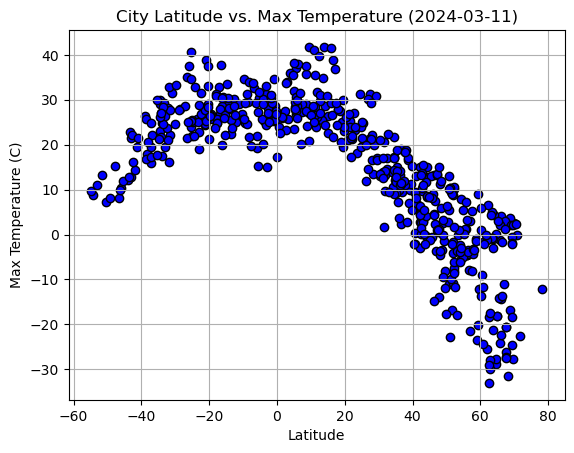

In [12]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values, facecolor="b", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-03-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

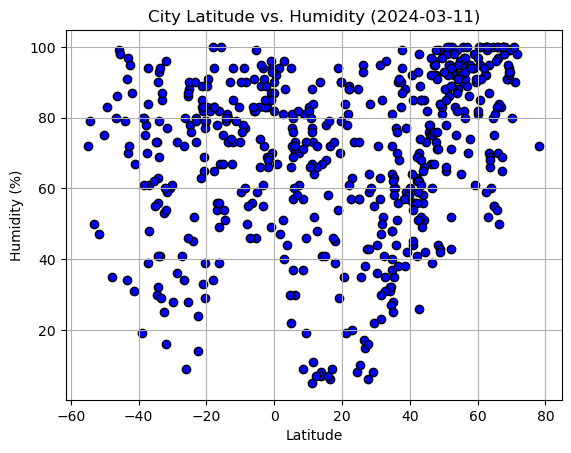

In [13]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, facecolor="b", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-03-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

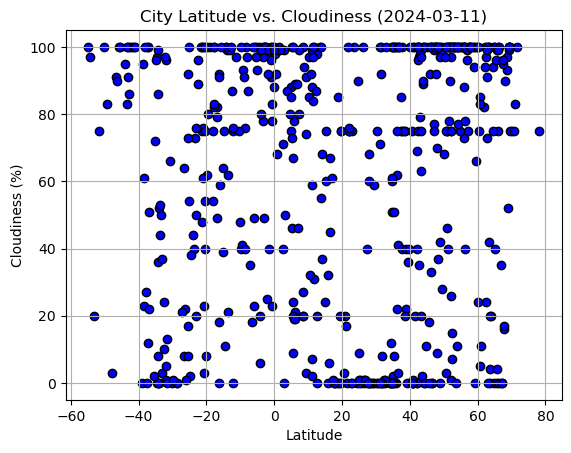

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, facecolor="b", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-03-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

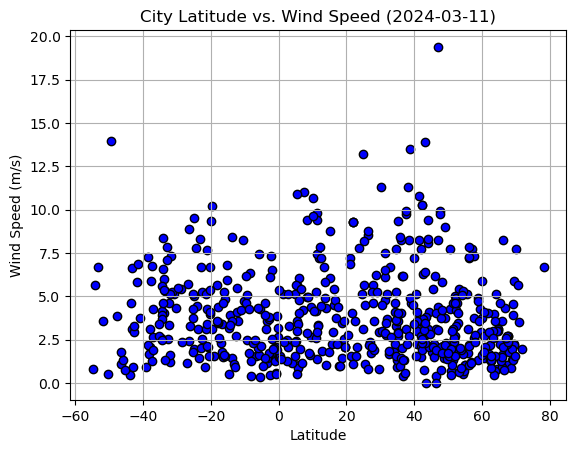

In [15]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, facecolor="b", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-03-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def linregress_function():
    (slope, intercept, r, p, stderr) = linregress(x_values, y_values)
    regress_values = (x_values * slope) + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    print(f'The r-value is: {r}')
    plt.plot(x_values, regress_values, color="r")
    plt.annotate(line_eq, xy=(min(x_values),min(y_values)), color="r", fontsize=14)
    

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,utrik,11.2278,169.8474,26.84,77,88,9.78,MH,1710173481
3,corner brook,48.9667,-57.9484,2.47,84,100,8.97,CA,1710173481
6,dudinka,69.4058,86.1778,-24.62,99,99,2.24,RU,1710173481
7,longyearbyen,78.2186,15.6401,-12.09,72,75,6.69,SJ,1710173481
14,tsengel,49.4783,100.8894,-8.19,81,100,2.31,MN,1710173482


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,8.22,80,91,1.07,NZ,1710173481
1,trairi,-3.2778,-39.2689,31.37,61,78,3.58,BR,1710173481
4,pariaman,-0.6190,100.1200,26.03,87,83,1.45,ID,1710173481
5,quellon,-43.1167,-73.6167,12.71,97,100,6.66,CL,1710173481
8,dunedin,-45.8742,170.5036,10.45,99,100,1.34,NZ,1710173482


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8659460562987721


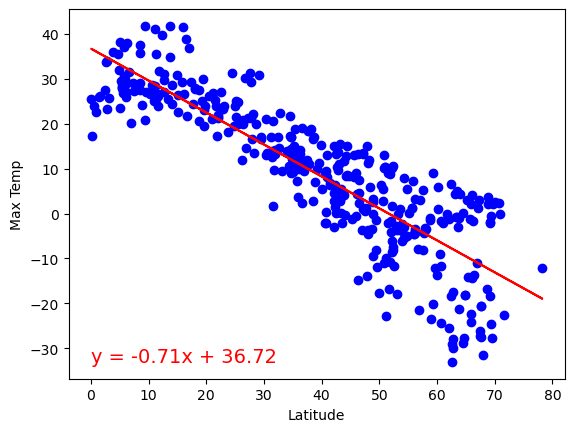

In [31]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.scatter(x_values,y_values, facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

linregress_function()

plt.show()

The r-value is: 0.5548572164332479


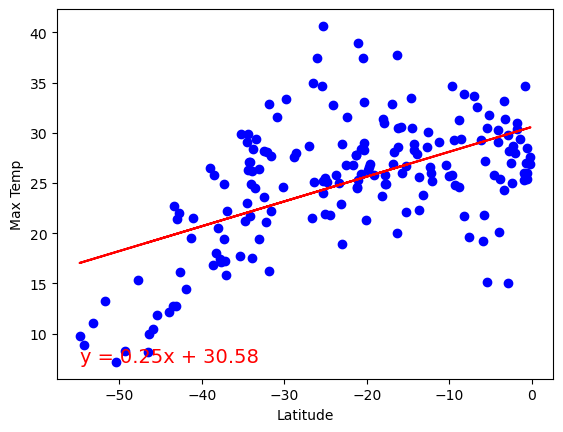

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.scatter(x_values,y_values, facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

linregress_function()

plt.show()

**Discussion about the linear relationship:** There is a strong correlation between latitude and max temperature; max temperature seems to increase the closer the latitude is to the equator. The correlation seems to be stronger in the northern hemisphere, since the absolute r-value is greater than that of the southern hemisphere. This may be due to the fact that there are more data points in northern_hemi_df (379), compared to 183 in southern_hemi_df.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4460424698375921


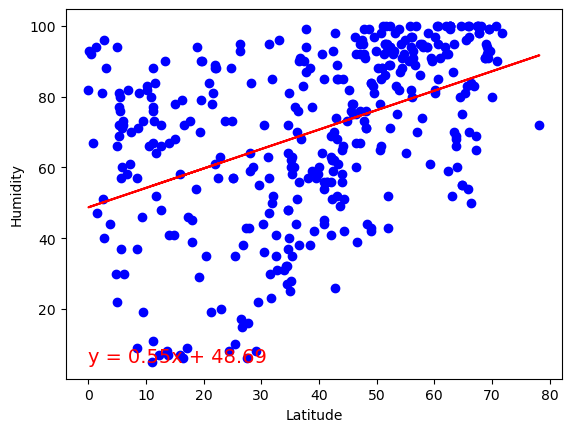

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.scatter(x_values,y_values, facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

linregress_function()

plt.show()

The r-value is: 0.19708081834722305


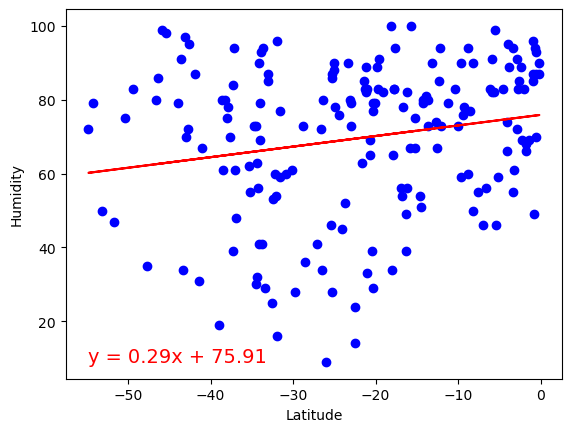

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.scatter(x_values,y_values, facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

linregress_function()

plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there appears to be a moderately strong correlation between latitude and humidity; humidity increases the further you are from the equator. 

For the southern hemisphere, there appears to be no correlation between the two. This is further supported by the fact that the r-value is extremely low (close to 0).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1930044146739924


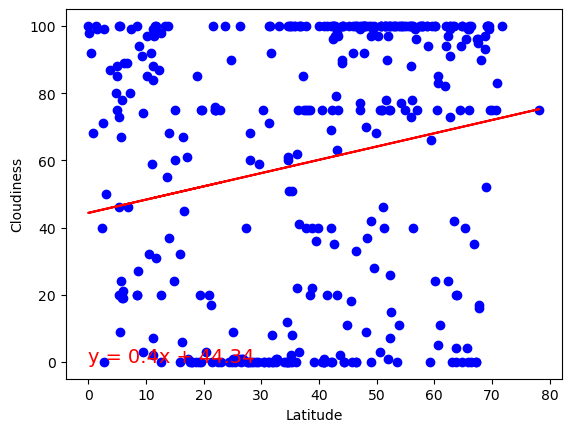

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.scatter(x_values,y_values, facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

linregress_function()

plt.show()

The r-value is: 0.16796986665349206

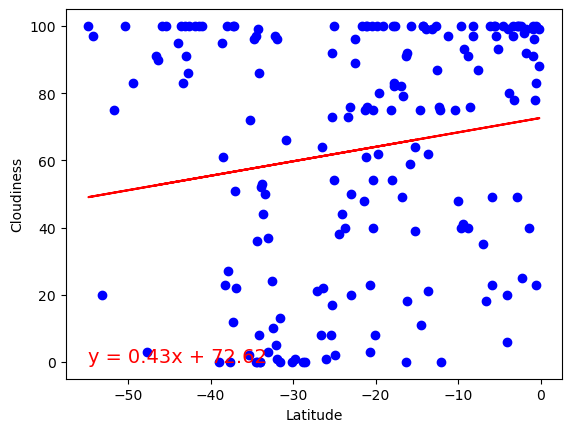

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.scatter(x_values,y_values, facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

linregress_function()

plt.show()

**Discussion about the linear relationship:** There appears to be no correlation between latitude and cloudiness. Both of the r-values are small (close to 0).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.16623220560886273


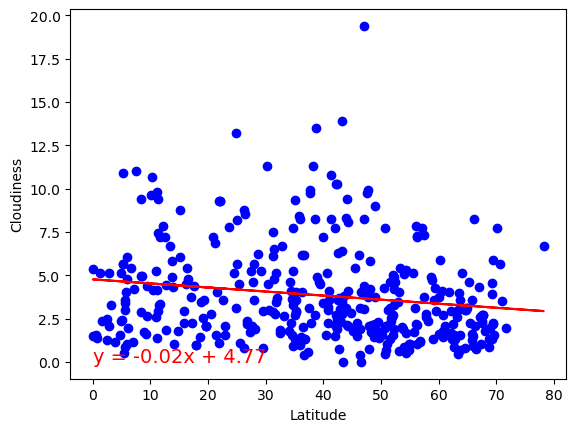

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.scatter(x_values,y_values, facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

linregress_function()

plt.show()

The r-value is: -0.1547121129453506


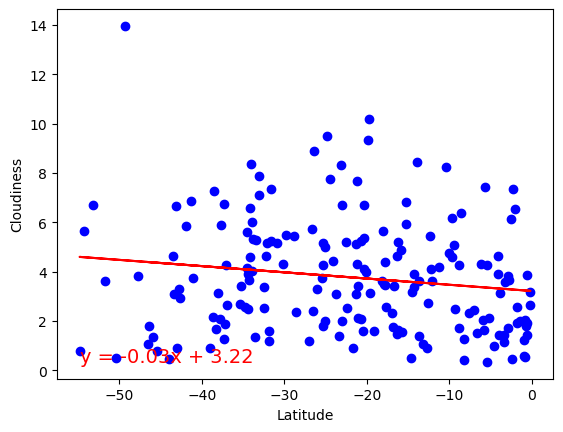

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.scatter(x_values,y_values, facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

linregress_function()

plt.show()

**Discussion about the linear relationship:** There appears to be no correlaiton between latitude and wind speed (across both hemispheres). 

This is further supported by the fact that the r-values are close to 0.